In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [3]:
# load data
datafile = r""
df = pd.read_csv(datafile)

In [4]:
df

,name,matchID,gameStart,gameEnd,participants_puuid
0,aBajVJnqEMcWf35guJ35fo7UWqdI-OFjytRTnsxu528q0J...,NA1_4171358423,2022-01-09 23:38:11.673,2022-01-10 00:03:34.430,['kjzu2AI2AQeTvoZQi163h_XMZ2xkJ8gQa2qyolEEknhu...
1,aBajVJnqEMcWf35guJ35fo7UWqdI-OFjytRTnsxu528q0J...,NA1_4171341896,2022-01-09 23:04:52.313,2022-01-09 23:34:15.195,['GPKVXdiZ7R24SjSqB_WxXDAm7DSrBD0cj42y9mK1NxbT...
2,aBajVJnqEMcWf35guJ35fo7UWqdI-OFjytRTnsxu528q0J...,NA1_4171320425,2022-01-09 22:57:36.382,2022-01-09 23:00:55.154,['nVrc1d2-pFRwzcQHtNGOz64Jj2hgTeCCPRhaU-uMm_4-...
3,aBajVJnqEMcWf35guJ35fo7UWqdI-OFjytRTnsxu528q0J...,NA1_4171282644,2022-01-09 22:18:23.399,2022-01-09 22:52:46.233,['qOuwUw9ORmpqum3vp0PurVDxX1o-thQJTa2IdneopqhX...
4,aBajVJnqEMcWf35guJ35fo7UWqdI-OFjytRTnsxu528q0J...,NA1_4170607643,2022-01-09 13:52:33.676,2022-01-09 14:32:39.778,['cCIC6dK-aAwnzau6NoPCThlEK9-Vq0kUmQ1SpOmN2vDj...
...,...,...,...,...,...
12775,mQdeHgemxyUuf70JclJltwnucEP8LUtmRCPzlOVLqrcUuh...,NA1_4854316365,2023-12-09 08:56:05.031,2023-12-09 09:30:23.922,['h-60ec2CQznzoUW9_JpvpDna7Mz-sg4CG6WueYXTxh17...
12776,mQdeHgemxyUuf70JclJltwnucEP8LUtmRCPzlOVLqrcUuh...,NA1_4854293717,2023-12-09 08:26:47.271,2023-12-09 08:44:25.692,['wttjeotXKGE2wwRSc6Xs3hFDgj7y8ZHUjeslWm5kjz_g...
12777,mQdeHgemxyUuf70JclJltwnucEP8LUtmRCPzlOVLqrcUuh...,NA1_4854263275,2023-12-09 07:47:08.318,2023-12-09 08:14:14.264,['O6HiUlekVlR9DGscA05V3SoNrFmHSkrwSgry9cfA33kU...
12778,mQdeHgemxyUuf70JclJltwnucEP8LUtmRCPzlOVLqrcUuh...,NA1_4853537563,2023-12-08 21:15:15.533,2023-12-08 21:54:10.950,['0-c5b0PISa_6VmHw4WbWrrs_wkzAiZssYVKrFq1-Epqo...


## Exploratory Data Analysis (EDA)

In [47]:
# drop duplicated rown:
df_eda = df.drop_duplicates()

In [6]:
# dropeed almost 4k rows
df_eda

,name,matchID,gameStart,gameEnd,participants_puuid
0,aBajVJnqEMcWf35guJ35fo7UWqdI-OFjytRTnsxu528q0J...,NA1_4171358423,2022-01-09 23:38:11.673,2022-01-10 00:03:34.430,['kjzu2AI2AQeTvoZQi163h_XMZ2xkJ8gQa2qyolEEknhu...
1,aBajVJnqEMcWf35guJ35fo7UWqdI-OFjytRTnsxu528q0J...,NA1_4171341896,2022-01-09 23:04:52.313,2022-01-09 23:34:15.195,['GPKVXdiZ7R24SjSqB_WxXDAm7DSrBD0cj42y9mK1NxbT...
2,aBajVJnqEMcWf35guJ35fo7UWqdI-OFjytRTnsxu528q0J...,NA1_4171320425,2022-01-09 22:57:36.382,2022-01-09 23:00:55.154,['nVrc1d2-pFRwzcQHtNGOz64Jj2hgTeCCPRhaU-uMm_4-...
3,aBajVJnqEMcWf35guJ35fo7UWqdI-OFjytRTnsxu528q0J...,NA1_4171282644,2022-01-09 22:18:23.399,2022-01-09 22:52:46.233,['qOuwUw9ORmpqum3vp0PurVDxX1o-thQJTa2IdneopqhX...
4,aBajVJnqEMcWf35guJ35fo7UWqdI-OFjytRTnsxu528q0J...,NA1_4170607643,2022-01-09 13:52:33.676,2022-01-09 14:32:39.778,['cCIC6dK-aAwnzau6NoPCThlEK9-Vq0kUmQ1SpOmN2vDj...
...,...,...,...,...,...
12775,mQdeHgemxyUuf70JclJltwnucEP8LUtmRCPzlOVLqrcUuh...,NA1_4854316365,2023-12-09 08:56:05.031,2023-12-09 09:30:23.922,['h-60ec2CQznzoUW9_JpvpDna7Mz-sg4CG6WueYXTxh17...
12776,mQdeHgemxyUuf70JclJltwnucEP8LUtmRCPzlOVLqrcUuh...,NA1_4854293717,2023-12-09 08:26:47.271,2023-12-09 08:44:25.692,['wttjeotXKGE2wwRSc6Xs3hFDgj7y8ZHUjeslWm5kjz_g...
12777,mQdeHgemxyUuf70JclJltwnucEP8LUtmRCPzlOVLqrcUuh...,NA1_4854263275,2023-12-09 07:47:08.318,2023-12-09 08:14:14.264,['O6HiUlekVlR9DGscA05V3SoNrFmHSkrwSgry9cfA33kU...
12778,mQdeHgemxyUuf70JclJltwnucEP8LUtmRCPzlOVLqrcUuh...,NA1_4853537563,2023-12-08 21:15:15.533,2023-12-08 21:54:10.950,['0-c5b0PISa_6VmHw4WbWrrs_wkzAiZssYVKrFq1-Epqo...


In [48]:
df_eda.groupby("name").count()

,matchID,gameStart,gameEnd,participants_puuid,month
name,,,,,
0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQeUzXWLZ_2rP_2VMo9NnCrJkkAipbTnraQ,161,161,161,161,161
3SCss5USdjOgqNoRuPe9CZUaZF3KbzwXdgjTJmrGd0pVhpJVd_01830GoSV98yPBpDythOtyn0wtyQ,388,388,388,388,388
3tM8Movt8jemPrWuO1aDsjVUBNO4k6EK1S1_xvAnnsZZmL0gz3YK-jPq2ptwq5G79np5FxkoyUvn0Q,92,92,92,92,92
4cQT2jI6Fc18dIqWwpN5D1EV5oAhTk_VvkYkDt3Zs5v080L_cOdv9ifBCJGOiERenbSu8uSjDJIIEQ,99,99,99,99,99
584tuqnMZ6HRfYBq7fwrl4FTuc-kvtt689bsgbYiu0SW52B-CefVisIraZcqMQu8niy2fNhkjTcnSw,130,130,130,130,130
5xBRtlBvNhkqPk7RfEUqqoBbvBWeiGWKnRTHnlPPfnBM79-UdM4Ew7Hnb1PI9BfHRsw3F_XO5VZKBQ,27,27,27,27,27
68J2Wr4oOhUUWLYvuuIo8P1MJIA2_RqFq4lPZVpuLLMKy2coSJcNiJ_P0OEPv32V59K-ccuBFmK6Bg,526,526,526,526,526
6zlpDigOxtcqxTTuRb-8fWa0IUIYYLXCDDFjVcNlD2OPYE8QPYVeBso7yb8lAEH_VnfIlTP9JvKKpQ,402,402,402,402,402
98jBqtlXic9wW2qa199qF5w_rt2SrXZxCK9dgbDBREe5m8iTaIkBbekOF4_RBTKLGEYRzXs_y1lt1w,44,44,44,44,44


In [10]:
# ended up with 47 unique players
# should look by number of games played connection to churn
df_eda["name"].nunique()

47

C:\Users\Owner\AppData\Local\Temp\ipykernel_8360\2024448728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['gameStart'] = pd.to_datetime(df_eda['gameStart'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_8360\2024448728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['month'] = df_eda['gameStart'].dt.month


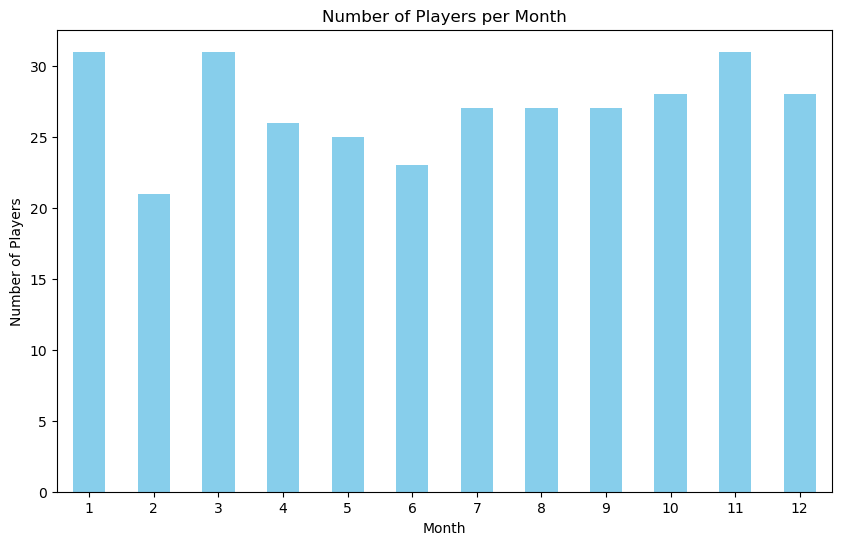

In [50]:
# Convert 'gameStart' to datetime format
df_eda['gameStart'] = pd.to_datetime(df_eda['gameStart'])

# Extract month from 'gameStart'
df_eda['month'] = df_eda['gameStart'].dt.month

# Count unique players for each month
monthly_player_counts = df_eda.groupby('month')['name'].nunique()

# Plotting
plt.figure(figsize=(10, 6))
monthly_player_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Players per Month')
plt.xlabel('Month')
plt.ylabel('Number of Players')
plt.xticks(rotation=0)
plt.show()


In [12]:
monthly_player_counts

month
1     31
2     21
3     31
4     26
5     25
6     23
7     27
8     27
9     27
10    28
11    31
12    28
Name: name, dtype: int64

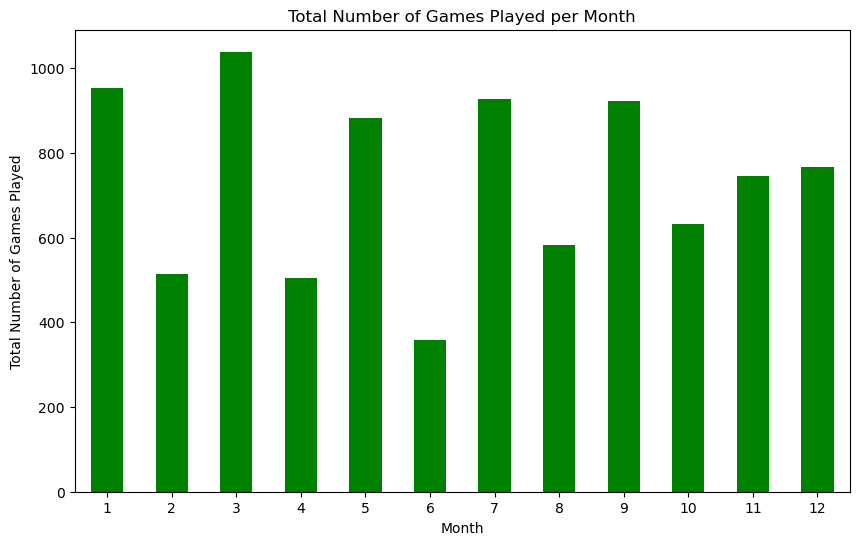

In [14]:
total_games_per_month = df_eda.groupby('month')['matchID'].count()

# Plotting
plt.figure(figsize=(10, 6))
total_games_per_month.plot(kind='bar', color='green')
plt.title('Total Number of Games Played per Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Games Played')
plt.xticks(rotation=0)
plt.show()

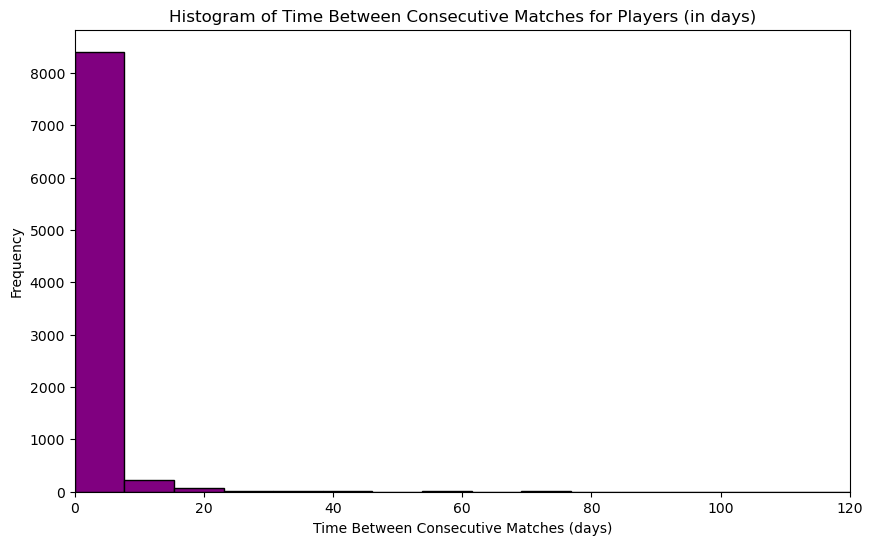

In [51]:
# Sort the DataFrame by player and 'gameStart'
df_eda = df_eda.sort_values(by=['name', 'gameStart'])

# Calculate the time delta between consecutive matches for each player
df_eda['time_between_consecutive_matches'] = df_eda.groupby('name')['gameStart'].diff()

# Drop the first row for each player since there's no previous match
df_eda = df_eda.dropna(subset=['time_between_consecutive_matches'])

# Convert the time delta to days for better readability (optional)
time_between_consecutive_matches_days = df_eda['time_between_consecutive_matches'] / pd.Timedelta('1 day')

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(time_between_consecutive_matches_days, bins=50, color='purple', edgecolor='black')
plt.title('Histogram of Time Between Consecutive Matches for Players (in days)')
plt.xlabel('Time Between Consecutive Matches (days)')
plt.ylabel('Frequency')
plt.xlim(0, 120)
plt.savefig(folder + '\hitsto_days_tbw.png')
plt.show()


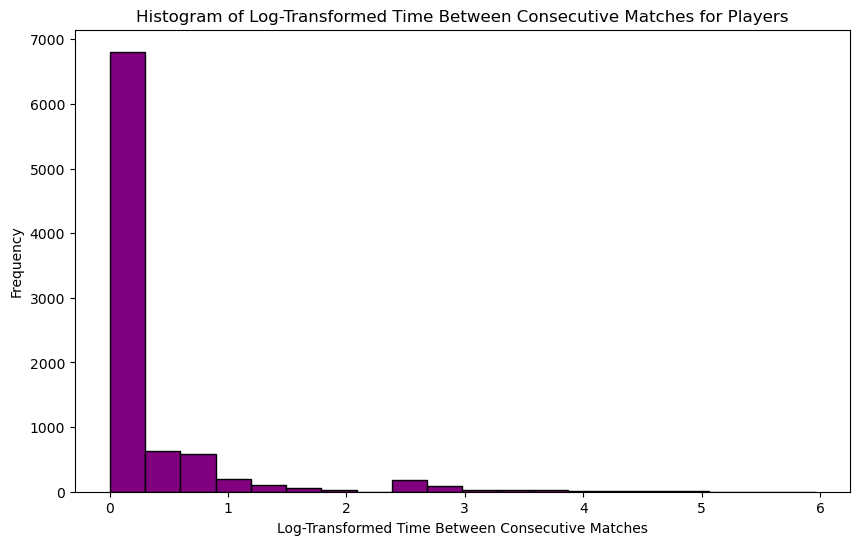

In [52]:
# log transform:
import numpy as np

# Log-transform the time between consecutive matches
log_time_between_consecutive_matches = np.log1p(time_between_consecutive_matches_days)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(log_time_between_consecutive_matches, bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Log-Transformed Time Between Consecutive Matches for Players')
plt.xlabel('Log-Transformed Time Between Consecutive Matches')
plt.ylabel('Frequency')
plt.savefig(folder + '\hitsto_days_tbw_logt.png')
plt.show()


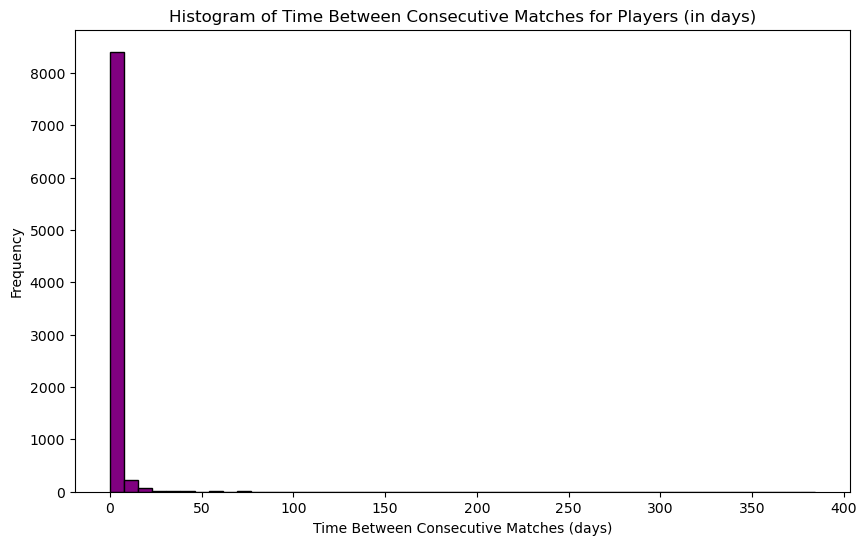

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(time_between_consecutive_matches_days, bins=50, color='purple', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Time Between Consecutive Matches for Players (in days)')
plt.xlabel('Time Between Consecutive Matches (days)')
plt.ylabel('Frequency')
plt.show()

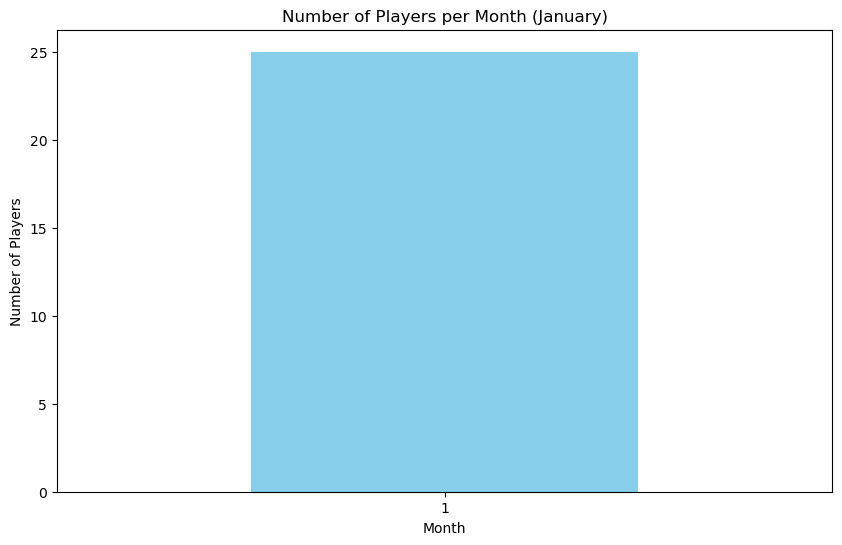

In [22]:
# Convert 'gameStart' to datetime format
df_eda['gameStart'] = pd.to_datetime(df_eda['gameStart'])

# Extract month from 'gameStart'
df_eda['month'] = df_eda['gameStart'].dt.month

# Filter out players who were not active in January
january_data = df_eda[df_eda['month'] == 1]

# Count unique players for each month
monthly_player_counts = january_data.groupby('month')['name'].nunique()

# Plotting
plt.figure(figsize=(10, 6))
monthly_player_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Players per Month (January)')
plt.xlabel('Month')
plt.ylabel('Number of Players')
plt.xticks(rotation=0)
plt.show()


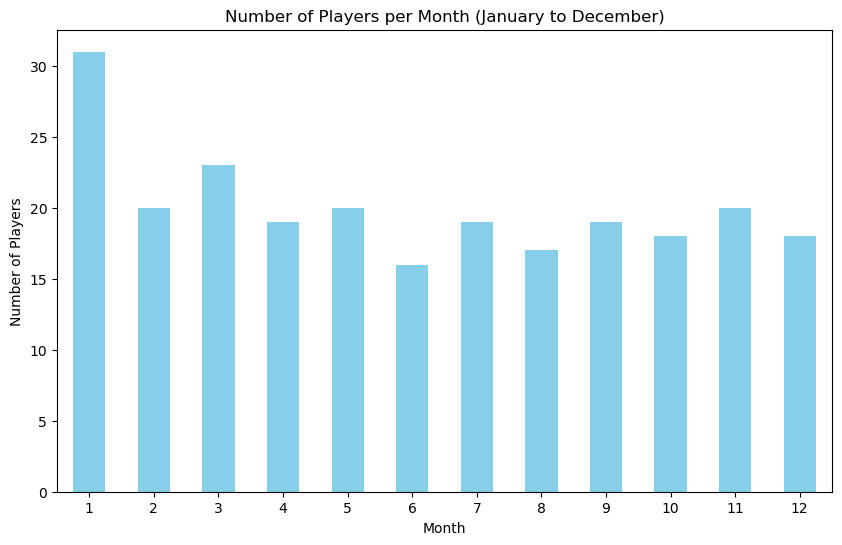

In [55]:
# Filter out players who were not active in January
january_players = df_eda[df_eda['month'] == 1]['name'].unique()

# Filter the DataFrame for players who were active in January
df_filtered = df_eda[df_eda['name'].isin(january_players)]

# Count unique players for each month
monthly_player_counts = df_filtered.groupby('month')['name'].nunique()

# Plotting
plt.figure(figsize=(10, 6))
monthly_player_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Players per Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Number of Players')
plt.xticks(rotation=0)
plt.savefig(folder + '\\num_by_month.png')
plt.show()

In [56]:
monthly_player_counts

month
1     31
2     20
3     23
4     19
5     20
6     16
7     19
8     17
9     19
10    18
11    20
12    18
Name: name, dtype: int64

In [27]:
df_filtered

,name,matchID,gameStart,gameEnd,participants_puuid,month,time_between_consecutive_matches
149,0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...,NA1_4536730828,2023-01-03 01:19:51.712,2023-01-03 01:57:15.894,['bgOq2k1xkOLgrAz7znpIdyzPn4hXhCP8FDlWuiKyOotW...,1,0 days 00:41:52.446000
148,0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...,NA1_4536776923,2023-01-03 02:00:20.925,2023-01-03 02:12:32.568,['k8IaUxKRN3DfrBqpK_esvi5mIwzGJ8WwyPyKhWQ73gX3...,1,0 days 00:40:29.213000
147,0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...,NA1_4536896085,2023-01-03 03:49:25.293,2023-01-03 04:03:56.782,['7uuyt8-86syms4HC35GNAyxVA42jM1QdkqvZoZ6IHlyX...,1,0 days 01:49:04.368000
146,0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...,NA1_4536913604,2023-01-03 04:08:24.651,2023-01-03 04:32:01.275,['8pPmwXZ5sMpfWgLQPIx0otCBPjWqF7os3JXHCF9qag6C...,1,0 days 00:18:59.358000
145,0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...,NA1_4536948435,2023-01-03 04:38:05.790,2023-01-03 05:12:18.283,['TDuSvvNRvAgmXjqy1WHG9reDTfLWY_Qk3RhbPL38Mr6S...,1,0 days 00:29:41.139000
...,...,...,...,...,...,...,...
8017,xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...,NA1_4648921312,2023-05-07 00:37:28.392,2023-05-07 01:06:36.242,['1X3fiMWtA2MYXZYC22qghVXlFJNI50dZyHVDM1KZELe5...,5,0 days 00:42:11.887000
8016,xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...,NA1_4648958445,2023-05-07 01:22:28.765,2023-05-07 01:52:05.973,['ZTaZ6NQIC9ttpT2Gtz8k57QC2IAlOh--fUMYYwGPzfh2...,5,0 days 00:45:00.373000
8015,xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...,NA1_4649272473,2023-05-07 06:13:42.649,2023-05-07 06:49:42.825,['_aCFuii6KqZJgCj3xCXiBpTJquf1IDQLdj3CWb7wqHDM...,5,0 days 04:51:13.884000
8014,xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...,NA1_4649425064,2023-05-07 11:05:02.502,2023-05-07 11:20:20.363,['Xn248M5AcaUfwIhmL1mrgfP_az7tK_fIHVUTl-NKe84q...,5,0 days 04:51:19.853000


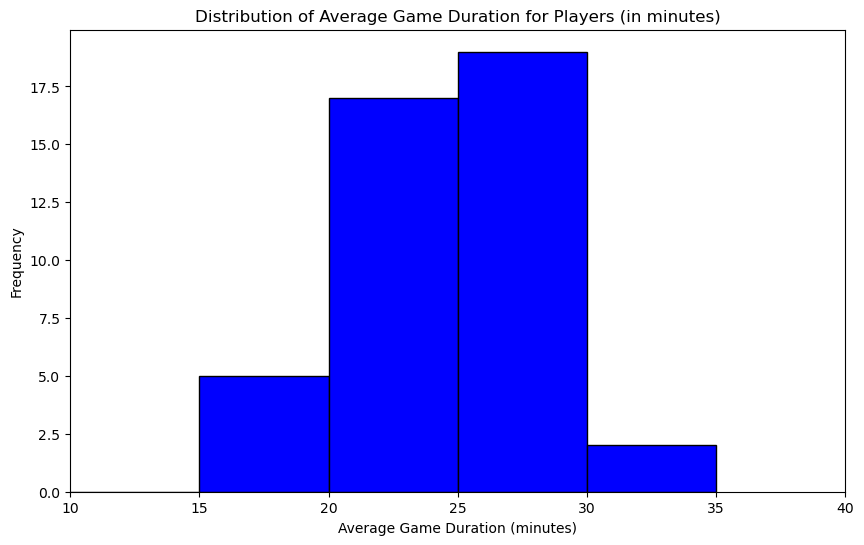

In [29]:
df_eda['gameStart'] = pd.to_datetime(df_eda['gameStart'])
df_eda['gameEnd'] = pd.to_datetime(df_eda['gameEnd'])

# Calculate the duration of each game
df_eda['game_duration'] = (df_eda['gameEnd'] - df_eda['gameStart']).dt.total_seconds()

# Group by player and calculate the average game duration
average_game_duration = df_eda.groupby('name')['game_duration'].mean()

# Convert the average game duration to minutes for better readability (optional)
average_game_duration_minutes = average_game_duration / 60

# Plotting the histogram with x-axis increments of 5 minutes
plt.figure(figsize=(10, 6))
plt.hist(average_game_duration_minutes, bins=range(0, int(average_game_duration_minutes.max()) + 6, 5), color='blue', edgecolor='black')
plt.title('Distribution of Average Game Duration for Players (in minutes)')
plt.xlabel('Average Game Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(10, 40)
plt.show()

## Survival Analysis K-M

In [31]:
df_filtered['gameStart'] = pd.to_datetime(df_filtered['gameStart'])
df_filtered['gameEnd'] = pd.to_datetime(df_filtered['gameEnd'])

# Sort DataFrame by player and 'gameStart'
df_sorted = df_filtered.sort_values(by=['name', 'gameStart'])

# Calculate time between consecutive matches for each player
df_sorted['time_between_matches'] = df_sorted.groupby('name')['gameStart'].diff()

# Drop the first row for each player since there's no previous match
df_sorted = df_sorted.dropna(subset=['time_between_matches'])

# Convert the time delta to days for better readability
df_sorted['time_between_matches_days'] = df_sorted['time_between_matches'].dt.days

# Display the resulting DataFrame
df_sorted[['name', 'gameStart', 'time_between_matches_days']]

C:\Users\Owner\AppData\Local\Temp\ipykernel_8360\2947811214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gameStart'] = pd.to_datetime(df_filtered['gameStart'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_8360\2947811214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gameEnd'] = pd.to_datetime(df_filtered['gameEnd'])


,name,gameStart,time_between_matches_days
148,0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...,2023-01-03 02:00:20.925,0
147,0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...,2023-01-03 03:49:25.293,0
146,0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...,2023-01-03 04:08:24.651,0
145,0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...,2023-01-03 04:38:05.790,0
144,0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...,2023-01-06 03:17:49.108,2
...,...,...,...
8017,xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...,2023-05-07 00:37:28.392,0
8016,xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...,2023-05-07 01:22:28.765,0
8015,xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...,2023-05-07 06:13:42.649,0
8014,xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...,2023-05-07 11:05:02.502,0


In [32]:
# Assuming df['gameStart'] and df['time_between_matches_days'] columns are available
# Identify players who have churned (haven't played another match by December)
df_sorted['last_match_date'] = df_sorted['gameStart'] + df_sorted['time_between_matches']
last_match_by_player = df_sorted.groupby('name')['last_match_date'].max().reset_index()
last_match_by_player['churned'] = (last_match_by_player['last_match_date'] < pd.Timestamp('2022-12-01'))

# Merge churn information back to the original DataFrame
df_sorted = df_sorted.merge(last_match_by_player[['name', 'churned']], on='name', how='left')

# Display the resulting DataFrame with churn information
print(df_sorted[['name', 'gameStart', 'time_between_matches_days', 'churned']])


                                                   name  \
0     0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...   
1     0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...   
2     0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...   
3     0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...   
4     0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...   
...                                                 ...   
4800  xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...   
4801  xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...   
4802  xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...   
4803  xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...   
4804  xhh_--INaingUVUCcZZKwksZXqK4TmVqk8EQsvRwdoPHak...   

                   gameStart  time_between_matches_days  churned  
0    2023-01-03 02:00:20.925                          0    False  
1    2023-01-03 03:49:25.293                          0    False  
2    2023-01-03 04:08:24.651                          0    False  
3    2023-01-03 04:38:0

In [33]:
# Assuming df['churned'] column is available
# Create a dataset for survival analysis
survival_data = df_sorted.groupby('name').agg({
    'churned': 'max',
    'time_between_matches_days': 'max'
}).reset_index()

# Display the resulting survival dataset
print(survival_data)


                                                 name  churned  \
0   0E5VaDtD25aKvApaibvuZPtQe__MqgUe92LAChMC-OufQe...    False   
1   3SCss5USdjOgqNoRuPe9CZUaZF3KbzwXdgjTJmrGd0pVhp...    False   
2   4cQT2jI6Fc18dIqWwpN5D1EV5oAhTk_VvkYkDt3Zs5v080...    False   
3   584tuqnMZ6HRfYBq7fwrl4FTuc-kvtt689bsgbYiu0SW52...    False   
4   5xBRtlBvNhkqPk7RfEUqqoBbvBWeiGWKnRTHnlPPfnBM79...     True   
5   6zlpDigOxtcqxTTuRb-8fWa0IUIYYLXCDDFjVcNlD2OPYE...    False   
6   D7xAw3D78vdRh9leUTV8gNCkymEUnapc3P6LaeM2MyiCDd...    False   
7   LFrR6XfT6LIRJMjT2ZjNe8sQOwQ2NaktPK9iSR3iQciMxH...    False   
8   MLzfjYwlAvyrbKJQoFmstpAu0bmHyNT-gEOefmWuSBg69d...    False   
9   OdYWj3dFDlc4kRS2fWHyl43R9QyEZ6KCvCPJVZpUSh9gzD...    False   
10  PVuv6Ik25ioWi8VuFI850fVrH2WbMWcZ8-I-OXhl-YQLoY...    False   
11  QA9S3zNvRwVQ6_wgMi5leq-aHL5VSiw7b_Hb3Wya0EH7QT...    False   
12  QUqq9ZybSfqRGJu_g7GNkTUWV5AQxUfHuyBOjADz8yTvLA...     True   
13  XMA9RwjGNP7GdAYOmXhX2nHoyhTxN2rfbofoLHpQdnHQil...    False   
14  aBajVJ

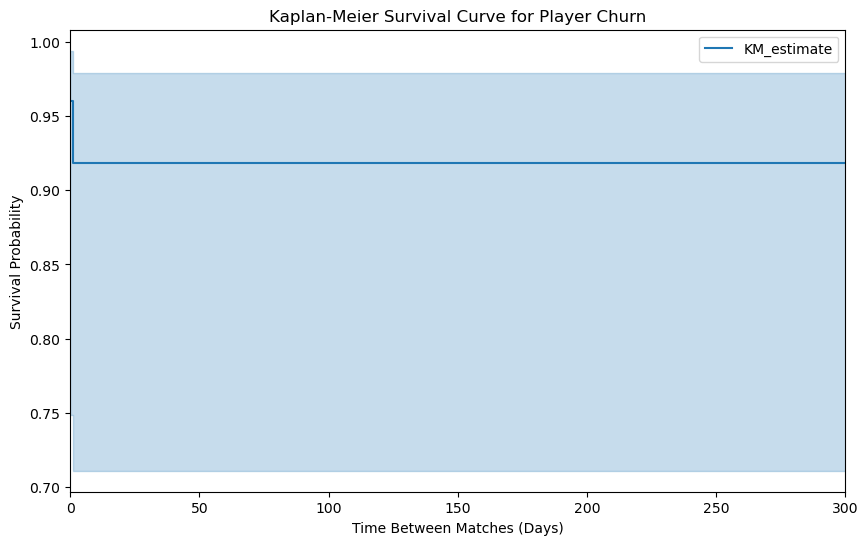

In [57]:
kmf = KaplanMeierFitter()
kmf.fit(survival_data['time_between_matches_days'], event_observed=survival_data['churned'])

# Plot the Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve for Player Churn')
plt.xlabel('Time Between Matches (Days)')
plt.ylabel('Survival Probability')
plt.xlim(0, 300)
plt.savefig(folder + '\kaplan_meier_curve.png')
plt.show()

In [40]:
folder = r""
plt.savefig(folder + '\kaplan_meier_curve.png')

<Figure size 640x480 with 0 Axes>

In [42]:
plt.show()

In [44]:
from lifelines.statistics import logrank_test

# Assuming 'survival_data' DataFrame is available
churned_group = survival_data[survival_data['churned'] == 1]
not_churned_group = survival_data[survival_data['churned'] == 0]

# Perform log-rank test
results = logrank_test(churned_group['time_between_matches_days'], not_churned_group['time_between_matches_days'], event_observed_A=churned_group['churned'], event_observed_B=not_churned_group['churned'])

# Display the log-rank test results
results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          30.57 <0.005     24.89

In [46]:
print(results)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          30.57 <0.005     24.89
